In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# from pathlib import Path

In [59]:
path = "myopia.csv"
myopia_data = pd.read_csv(path)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


Part 1: Prepare the Data
Read myopia.csv into a Pandas DataFrame.

Remove the "MYOPIC" column from the dataset.

Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!
Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [60]:
myopia_data = myopia_data.drop(columns=["MYOPIC"])
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [61]:
myopia_data.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [62]:
scaler = StandardScaler()
myopia_data_scaled = scaler.fit_transform(myopia_data[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [63]:
myopia_data_scaled.shape

(618, 14)

Part 2: Apply Dimensionality Reduction
Perform dimensionality reduction with PCA. How did the number of the features change?
Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.
Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [64]:
# Initialize PCA model
pca = PCA(n_components=.9)

myopia_pca = pca.fit_transform(myopia_data_scaled)
myopia_pca.shape

(618, 10)

In [65]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [66]:
tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(myopia_pca)

In [67]:
tsne_features.shape

(618, 2)

In [75]:
myopia_data.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'x', 'y'],
      dtype='object')

In [76]:
# Prepare to plot the dataset

# The first column of transformed features
X = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

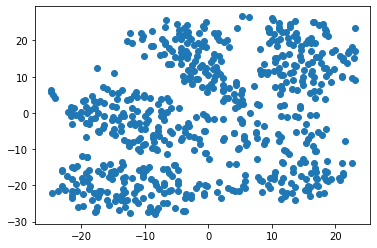

In [77]:
# Visualize the clusters
plt.scatter(X, y)
plt.show()

Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [78]:
model = KMeans(n_clusters=3, random_state=5)

In [79]:
type(model)

sklearn.cluster._kmeans.KMeans

In [80]:
model.fit(myopia_pca)

KMeans(n_clusters=3, random_state=5)

In [82]:
# Get predictions
predictions = model.predict(myopia_pca)

In [85]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

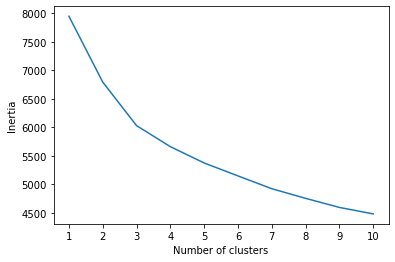

In [86]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

It appears that the ideal number of clusters appears to be 2 or 3. My recommendation is to narrow down the sample size to 2 or 3 disctict clusters and further analyze that new dataset to see if there are additional ways to cluster further. 